## libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, ColumnDataSource, output_file
from bokeh.models import HoverTool
from pathlib import Path

## initialization

In [2]:
CLUSTER = 'NGC_2323'

In [3]:
STARS_DIRECTORY = Path('../sessions/')
ISOCHRONES_DIRECTORY = Path ('../isochrones/')
MAIN_DIRECTORY = Path('../')

In [4]:
def read_file(filename):
    df = pd.read_csv(filename, delimiter='\\s+')
    df = df.apply(pd.to_numeric, errors='coerce')
    try:
        df.dropna(subset = ['phot_g_mean_mag','bp_rp'], inplace = True)
    except:
        pass
    return df

def plot_CMD (data):
    source = ColumnDataSource(
            data=dict(
                x=data['bp_rp'],
                y=data['phot_g_mean_mag'],
            )
        )
    hover = HoverTool(
            tooltips=[
                ("index", "$index"),
                ("(x,y)", "($x, $y)"),
            ]
        )
    output_file(f'CMD.html')
    
    p = figure(plot_width=1300, plot_height=900, tools=[hover],x_range = (0.3, 1.6), y_range = (18, 9))
    p.circle('x', 'y', size=5, source=source, color = "black", alpha = 0.65)
    return show(p)

def plot_CMD_binaries (data_s, data_b):
    source_s = ColumnDataSource(
            data=dict(
                x=data_s['bp_rp'],
                y=data_s['phot_g_mean_mag'],
            )
        )
    source_b = ColumnDataSource(
            data=dict(
                x=data_b['bp_rp'],
                y=data_b['phot_g_mean_mag'],
            )
    )
    hover = HoverTool(
            tooltips=[
                ("index", "$index"),
                ("(x,y)", "($x, $y)"),
            ]
        )
    output_file(f'CMD.html')
    
    p = figure(plot_width=1300, plot_height=900, tools=[hover],x_range = (0.3, 1.6), y_range = (18, 9))
    p.circle('x', 'y', size=5, source=source_s, color = "black", alpha = 0.65)
    p.circle('x', 'y', size=5, source=source_b, color = "red", alpha = 0.75)
    return show(p)

In [5]:
cluster_data = read_file(STARS_DIRECTORY / f'{CLUSTER}_selected_interval')
plot_CMD(cluster_data)

In [6]:
singles_data = cluster_data.copy()
binaries_data = pd.DataFrame()

## binaries separation

In [7]:
# changing data manually! too risky!
command = 'continue'

while command == 'continue':
    to_do, index = input("1. 'b' for separation binary, 's 0' for stop, 'r 0' for returning previous data, 'a 0' to show again Bokeh plot 2. index of star").split(' ')
    index = int(index)
    if to_do == 'b':
        data_saved_b = binaries_data
        data_saved_s = singles_data
        
        binaries_data = binaries_data.append(singles_data.iloc[index])
        binaries_data = binaries_data[singles_data.columns]
        singles_data = singles_data.drop(index=index,axis=0)
        singles_data.index = pd.RangeIndex(len(singles_data.index))
        binaries_data.index = pd.RangeIndex(len(binaries_data.index))
    if to_do == 'r':
        singles_data = data_saved_s
        binaries_data = data_saved_b
    if to_do == 's':
        command = 'stop'
    if to_do == 'a':
        plot_CMD_binaries(singles_data, binaries_data)

1. 'b' for separation binary, 's 0' for stop, 'r 0' for returning previous data, 'a 0' to show again Bokeh plot 2. index of starb 367
1. 'b' for separation binary, 's 0' for stop, 'r 0' for returning previous data, 'a 0' to show again Bokeh plot 2. index of starb 360
1. 'b' for separation binary, 's 0' for stop, 'r 0' for returning previous data, 'a 0' to show again Bokeh plot 2. index of starb 292
1. 'b' for separation binary, 's 0' for stop, 'r 0' for returning previous data, 'a 0' to show again Bokeh plot 2. index of starb 278
1. 'b' for separation binary, 's 0' for stop, 'r 0' for returning previous data, 'a 0' to show again Bokeh plot 2. index of starb 235
1. 'b' for separation binary, 's 0' for stop, 'r 0' for returning previous data, 'a 0' to show again Bokeh plot 2. index of starb 233
1. 'b' for separation binary, 's 0' for stop, 'r 0' for returning previous data, 'a 0' to show again Bokeh plot 2. index of starb 202
1. 'b' for separation binary, 's 0' for stop, 'r 0' for return

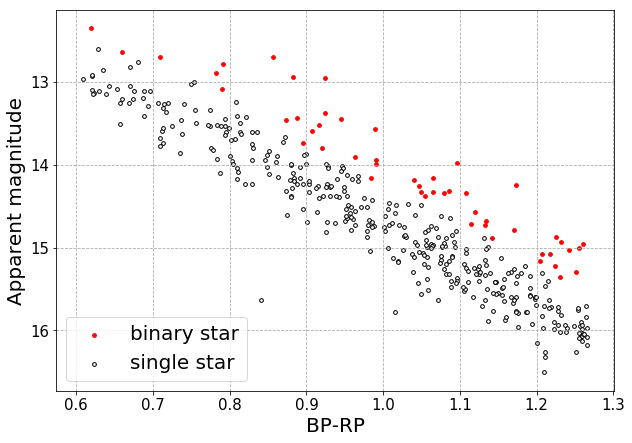

In [8]:
# output files 
fig, ax = plt.subplots(figsize=(10, 7)) #16:14 is size ratio 
ax.scatter(binaries_data['bp_rp'], binaries_data['phot_g_mean_mag'], s=14, c='red', label = 'binary star')
ax.scatter(singles_data['bp_rp'], singles_data['phot_g_mean_mag'], s=14, facecolor='white', edgecolor='black', label = 'single star') 
ax.grid(c='#aaaaaa', ls='--')
locs, labels = plt.yticks()
locs, labels = plt.xticks()
ax.legend(fontsize = 20, loc = 'lower left')
ax.invert_yaxis()
plt.xlabel("BP-RP", size = 20)
plt.ylabel("Apparent magnitude", size = 20)
ax.tick_params(axis='both', which='major', labelsize=15)

plt.savefig(MAIN_DIRECTORY / 'plots' / f'{CLUSTER}_separated.pdf')

## saving data

In [9]:
singles_data.to_csv(MAIN_DIRECTORY / 'clusters_research' / f'{CLUSTER}_separated_singles', sep=' ', index=False, na_rep='NULL')
binaries_data.to_csv(MAIN_DIRECTORY / 'clusters_research' / f'{CLUSTER}_separated_binaries', sep=' ', index=False, na_rep='NULL')
